         title_group  min_salary_vnd  max_salary_vnd
0                 AI    1.085200e+07    2.409362e+07
1   Business Analyst    1.807297e+07    3.141286e+07
2      Data Engineer    1.675000e+07    3.542000e+07
3           Designer    1.010667e+07    2.344444e+07
4              Other    2.422576e+07    2.588773e+07
5    Project Manager    2.753333e+07    4.911724e+07
6  Quality Assurance    1.343191e+07    2.539176e+07
7           Security    1.616109e+07    2.890732e+07
8  Software Engineer    1.591782e+07    3.304214e+07


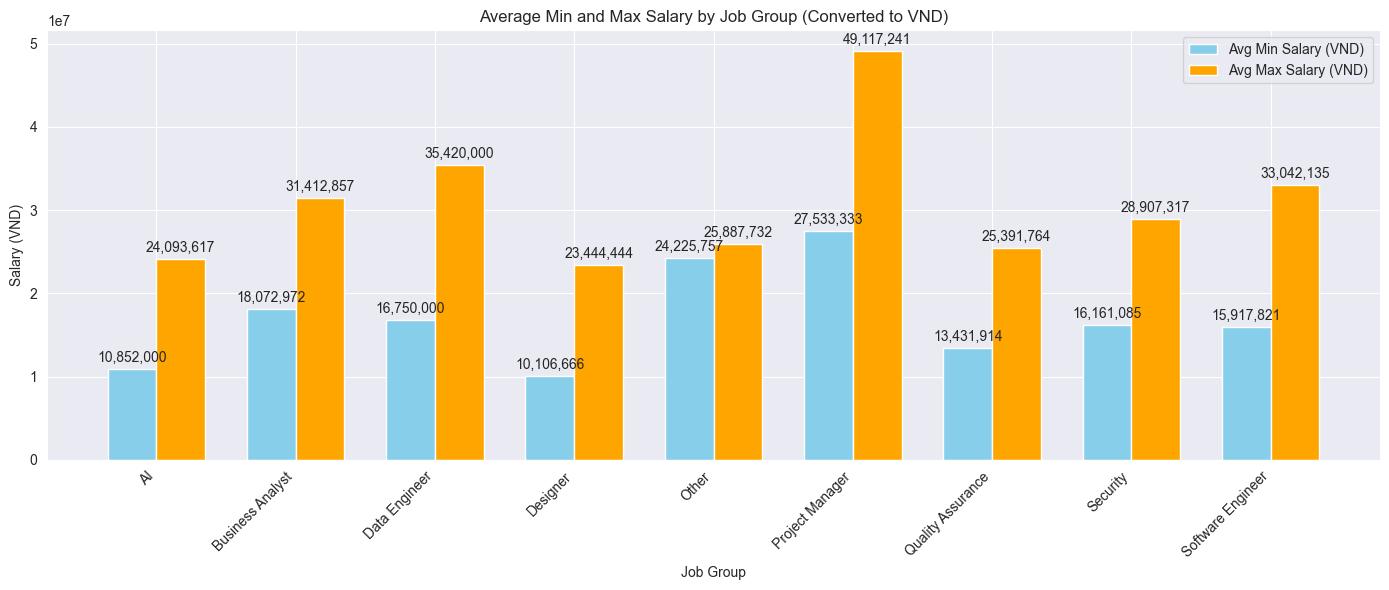

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.utils.contants import USD_TO_VND

# Load dữ liệu
df = pd.read_csv("../data/processed/data_cleaned.csv")

# Convert min and max salary to "VND" unit, ignore null and 0
df['min_salary_vnd'] = df.apply(
    lambda x: x['min_salary']*USD_TO_VND
    if pd.notnull(x['min_salary']) and x['min_salary'] > 0 and x['salary_unit']=='USD'
    else (x['min_salary'] if pd.notnull(x['min_salary']) and x['min_salary'] > 0 else None),
    axis=1
)

df['max_salary_vnd'] = df.apply(
    lambda x: x['max_salary']*USD_TO_VND
    if pd.notnull(x['max_salary']) and x['max_salary'] > 0 and x['salary_unit']=='USD'
    else (x['max_salary'] if pd.notnull(x['max_salary']) and x['max_salary'] > 0 else None),
    axis=1
)


# Calculate AVG min and max salary by title group
salary_avg = df.groupby('title_group')[['min_salary_vnd','max_salary_vnd']].mean().reset_index()

print(salary_avg)

# Two bar chart
title_groups = salary_avg['title_group']
min_salaries = salary_avg['min_salary_vnd']
max_salaries = salary_avg['max_salary_vnd']

x = np.arange(len(title_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/2, min_salaries, width, label='Avg Min Salary (VND)', color='skyblue')
rects2 = ax.bar(x + width/2, max_salaries, width, label='Avg Max Salary (VND)', color='orange')

# Label and title
ax.set_xlabel('Job Group')
ax.set_ylabel('Salary (VND)')
ax.set_title('Average Min and Max Salary by Job Group (Converted to VND)')
ax.set_xticks(x)
ax.set_xticklabels(title_groups, rotation=45, ha='right')
ax.legend()

# Add value on bar
for rect in rects1 + rects2:
    height = rect.get_height()
    if pd.notnull(height):
        ax.annotate(f'{int(height):,}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


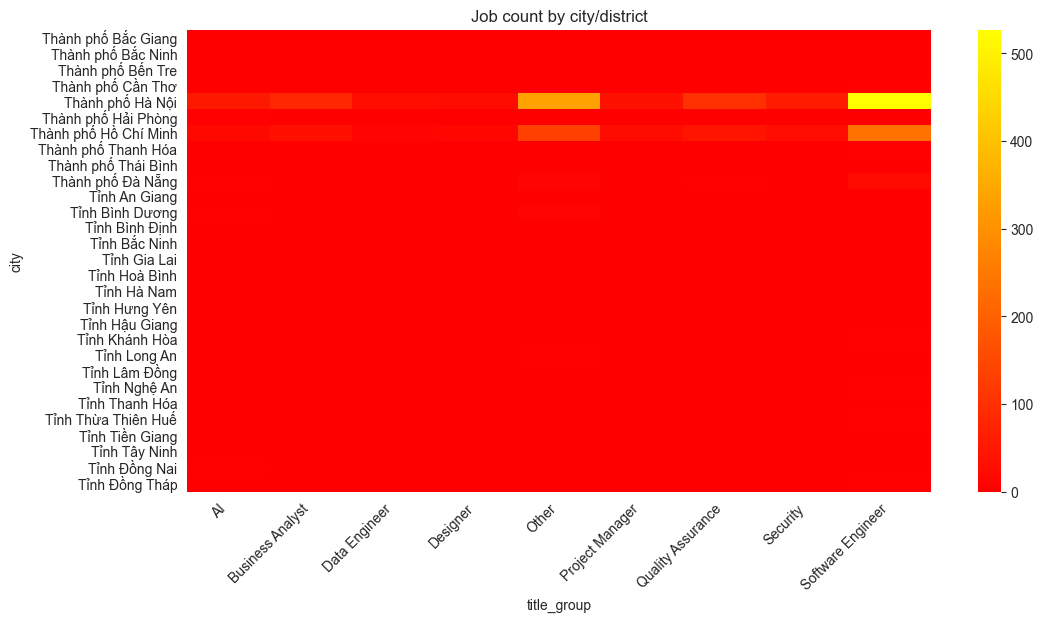

In [44]:
heat = df.pivot_table(index='city', columns='title_group', values='job_title', aggfunc='count').fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap='autumn')
plt.title("Job count by city/district")
plt.xticks(rotation=45, ha='right')
plt.show()

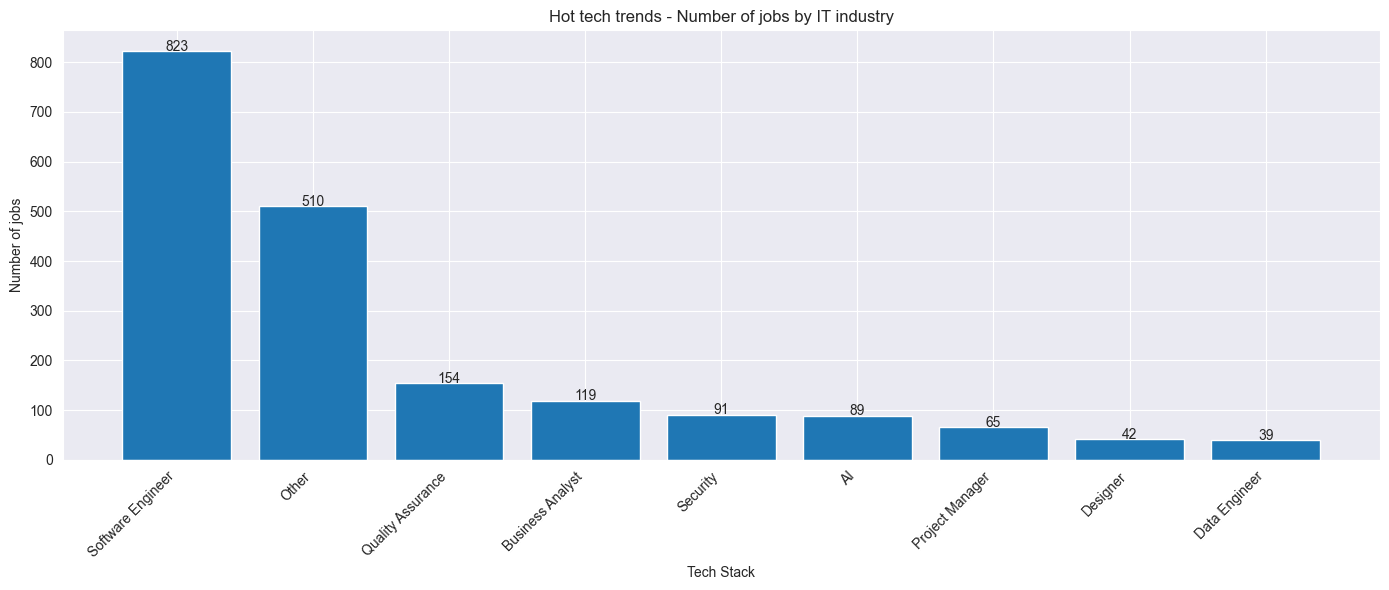

In [52]:
tech_count = (
    df[df['title_group'].notna()]
      .groupby('title_group')
      .size()
      .reset_index(name='count')
      .sort_values('count', ascending=False)
)

plt.figure(figsize=(14, 6))

# Draw bar chart
plt.bar(tech_count['title_group'], tech_count['count'])

plt.ylabel("Number of jobs")
plt.xlabel("Tech Stack")
plt.title("Hot tech trends - Number of jobs by IT industry")

# rotate label
plt.xticks(rotation=45, ha='right')

# Add value on bar
for x, y in zip(tech_count['title_group'], tech_count['count']):
    plt.text(x, y + 0.5, str(y), ha='center')

plt.tight_layout()
plt.show()
